<a href="https://colab.research.google.com/github/EstebanGarciaG/Lectures/blob/main/ModelingBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias

Bias in research refers to systematic errors or deviations from the truth, leading to incorrect conclusions or interpretations. Bias can occur at various stages of research, from the formulation of the hypothesis to data collection, analysis, and reporting.



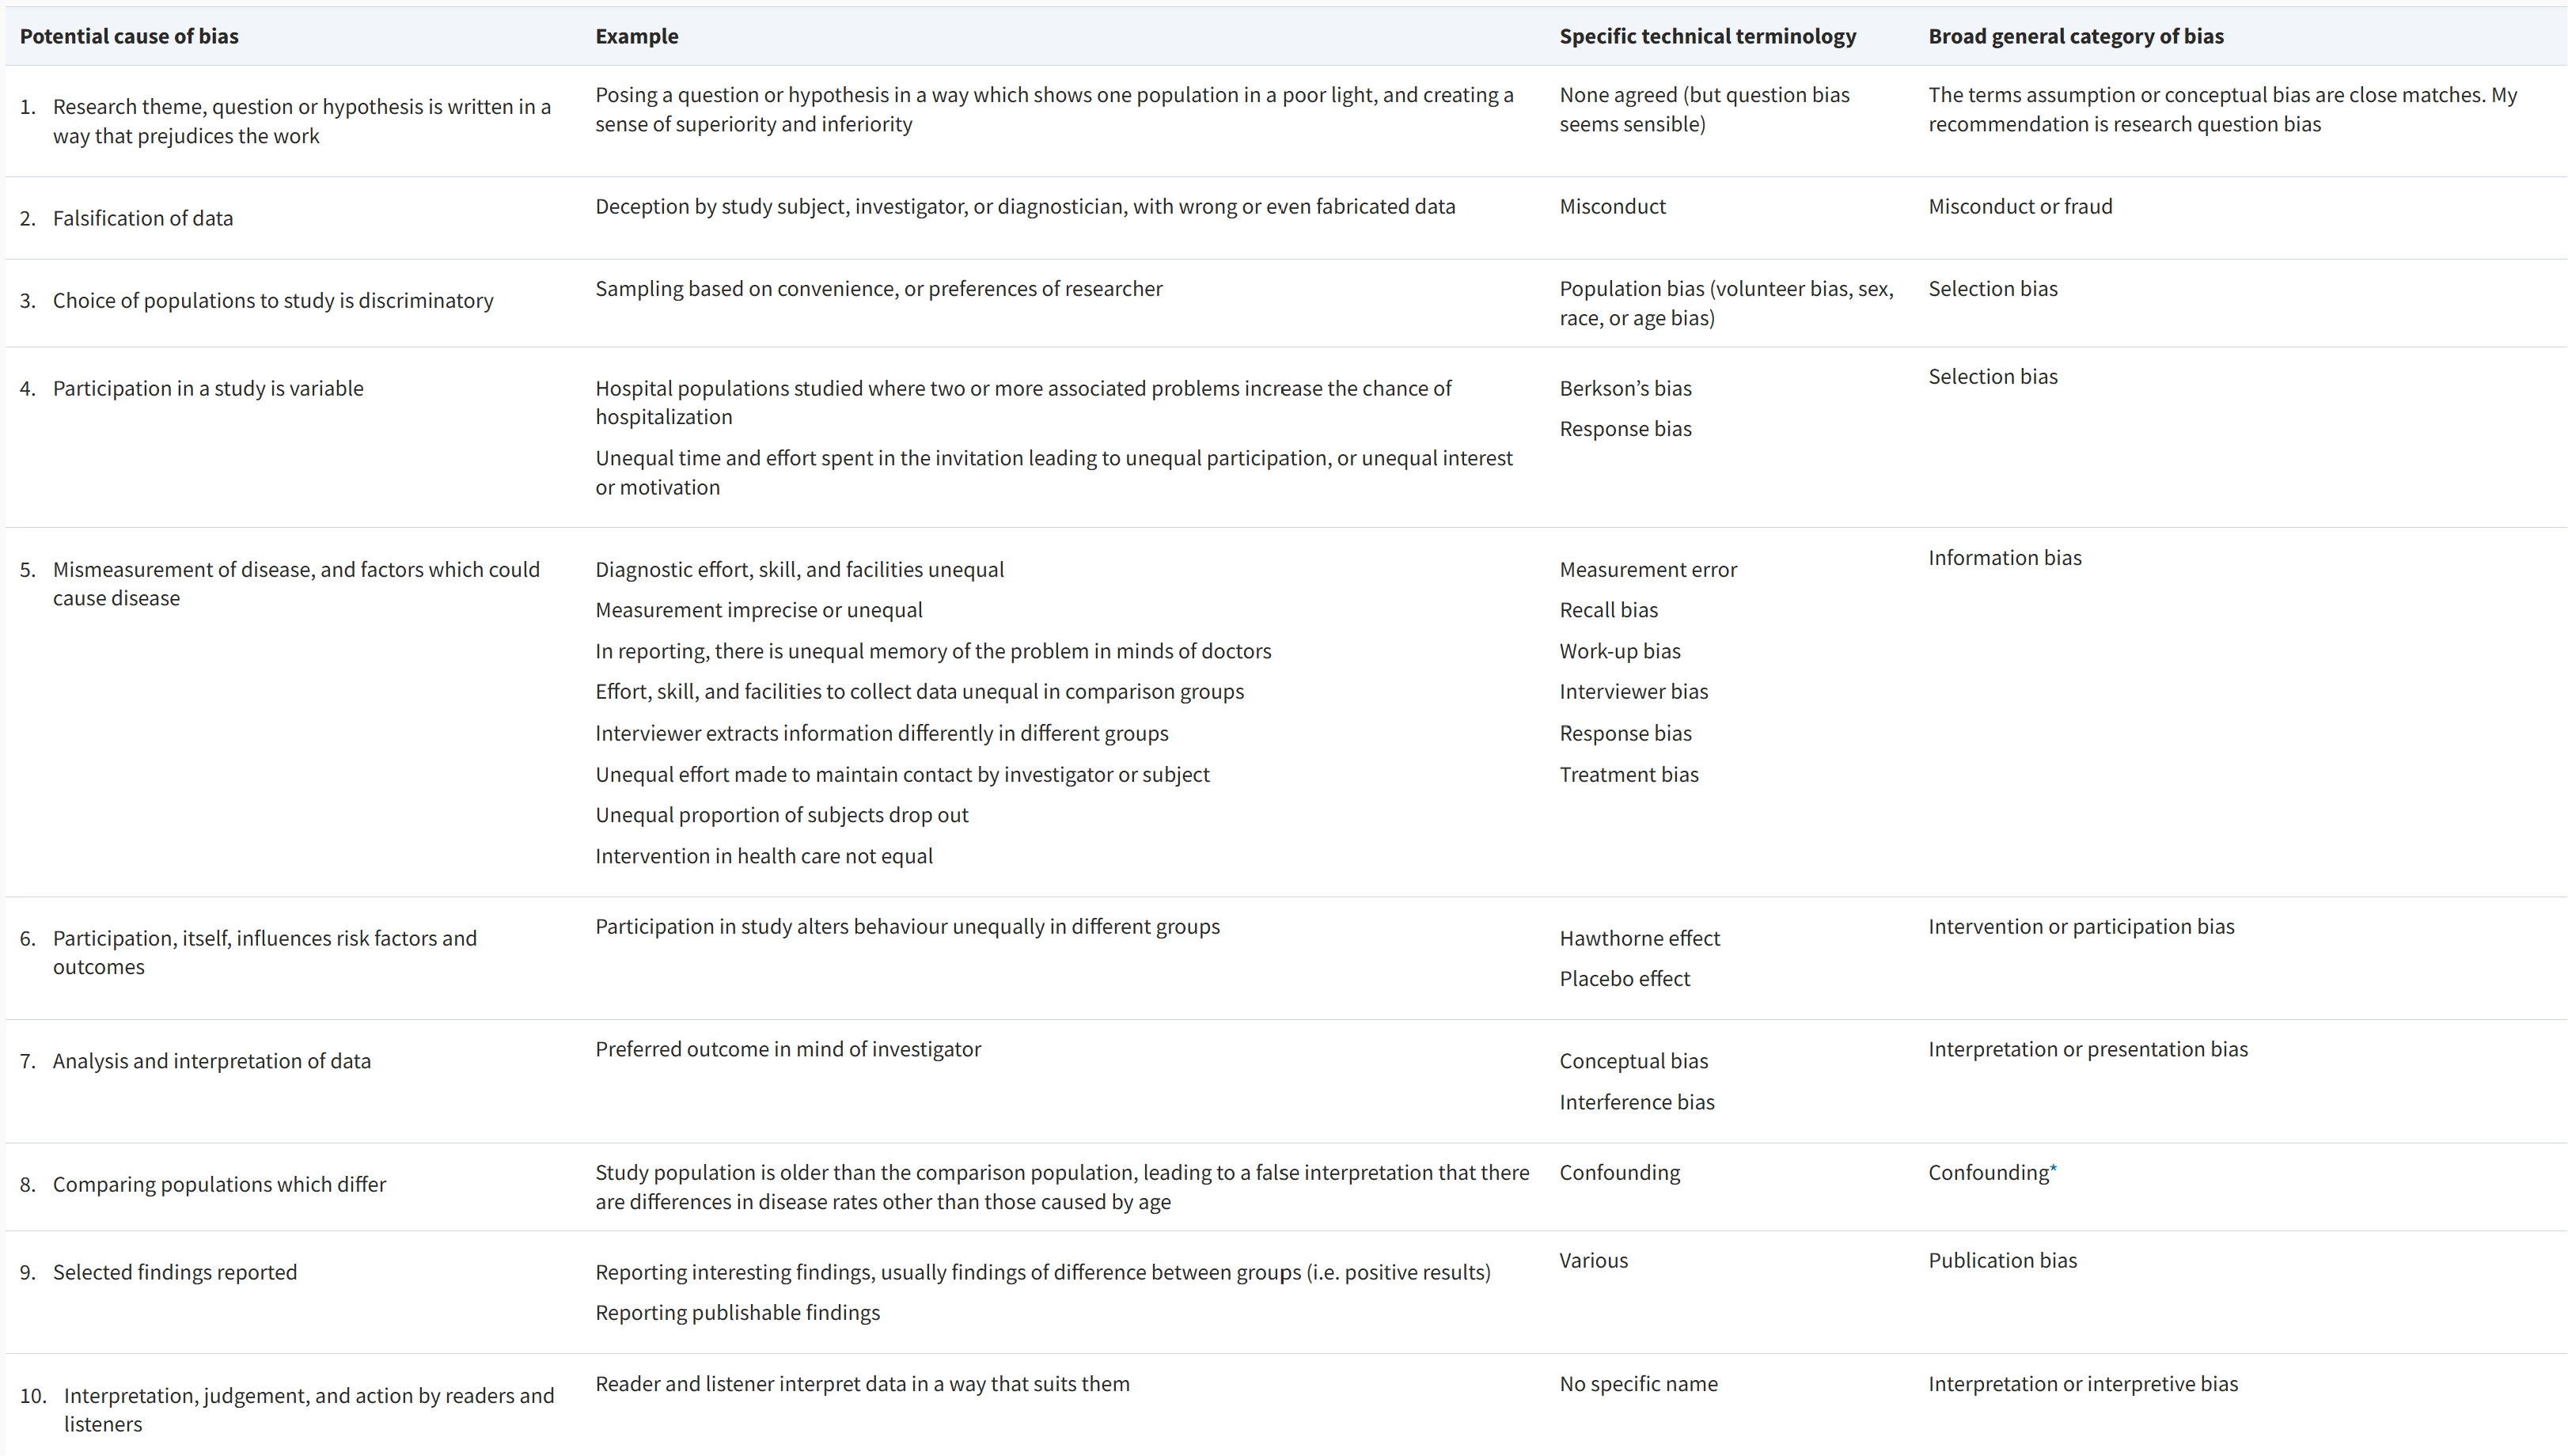

Table from: Concepts of Epidemiology: Integrating the ideas, theories, principles, and methods of epidemiology, Chapter 4 (3 edn)
Raj S. Bhopal

# Bias in Modelling
In the context of modeling, bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. Bias is one component of the model error, with the other being variance.



This height country-specific data for all countries file was downloaded from the NCD Risk Factor Collaboration (NCD-RisC) website: https://www.ncdrisc.org/data-downloads-height.html

In [11]:
import pandas as pd
original_data = pd.read_csv('/content/NCD_RisC_Lancet_2020_height_child_adolescent_country.csv')

df=original_data.loc[(original_data['Country']=='Colombia')&(original_data['Year']==2002)&(original_data['Sex']=='Boys')]
df.sample(5)

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
20740,Colombia,Boys,2002,15,162.742024,161.634233,163.869168,0.575716
20735,Colombia,Boys,2002,10,133.972607,132.820040,135.122881,0.588198
20736,Colombia,Boys,2002,11,139.040815,137.913222,140.157808,0.578727
20737,Colombia,Boys,2002,12,144.858301,143.721068,145.971847,0.575635
20731,Colombia,Boys,2002,6,113.692601,112.434907,114.921906,0.636110


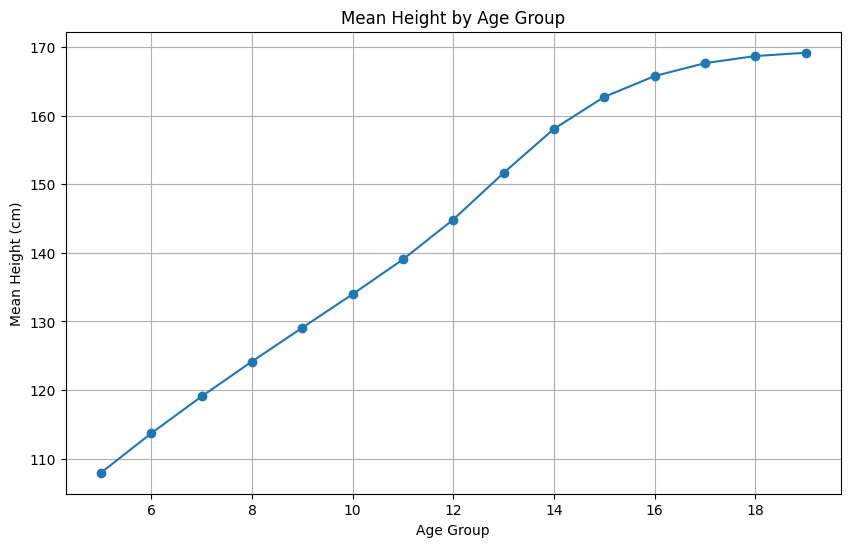

In [12]:
import matplotlib.pyplot as plt

# Group by age group and calculate the mean height
#age_height_df = df.groupby('Age group')['Mean height'].mean().reset_index()
age_height_df = df[['Age group','Mean height']]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_height_df['Age group'], age_height_df['Mean height'], marker='o')
plt.xlabel('Age Group')
plt.ylabel('Mean Height (cm)')
plt.title('Mean Height by Age Group')
plt.grid(True)
plt.show()


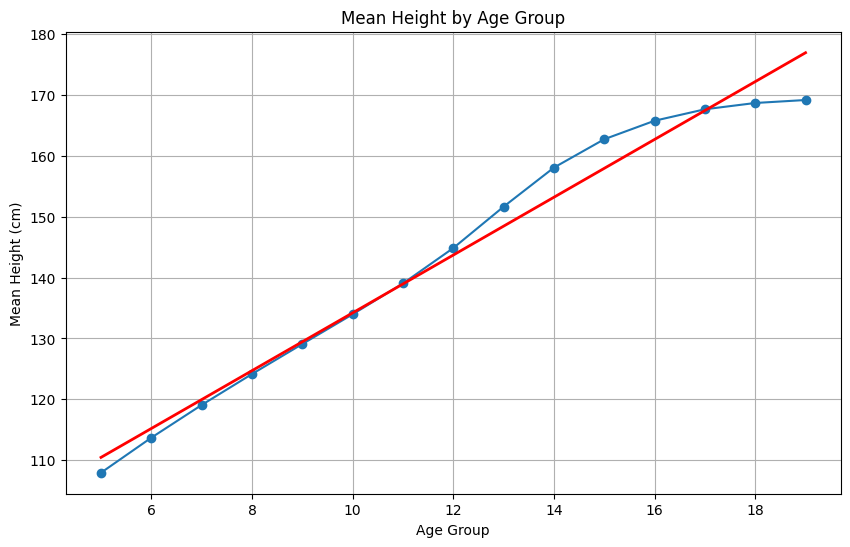

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = age_height_df[['Age group']].values
y = age_height_df['Mean height'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_height_df['Age group'], age_height_df['Mean height'], marker='o')
plt.xlabel('Age Group')
plt.ylabel('Mean Height (cm)')
plt.title('Mean Height by Age Group')

plt.plot(age_height_df['Age group'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.grid(True)
plt.show()

Bias error occurs when the model is too simple and cannot capture the underlying patterns in the data. High bias can cause the model to underfit, leading to poor performance on both the training and testing data.

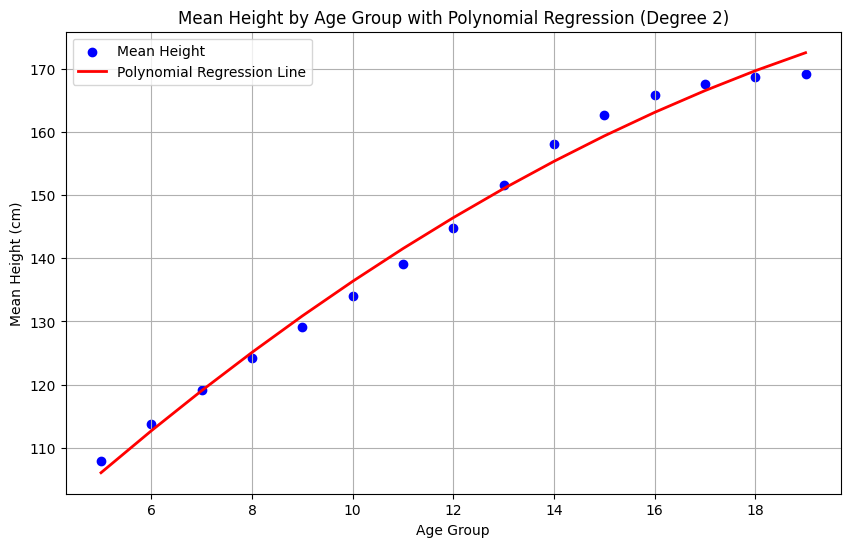

In [14]:


def plot_polynomial_regression(age_height_df, degree=2):
    # Prepare the data
    X = age_height_df[['Age group']].values
    y = age_height_df['Mean height'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(age_height_df['Age group'], age_height_df['Mean height'], color='blue', label='Mean Height')
    plt.plot(age_height_df['Age group'], y_poly_pred, color='red', linewidth=2, label='Polynomial Regression Line')
    plt.xlabel('Age Group')
    plt.ylabel('Mean Height (cm)')
    plt.title(f'Mean Height by Age Group with Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.grid(True)
    plt.show()



# Example usage
plot_polynomial_regression(age_height_df, degree=2)


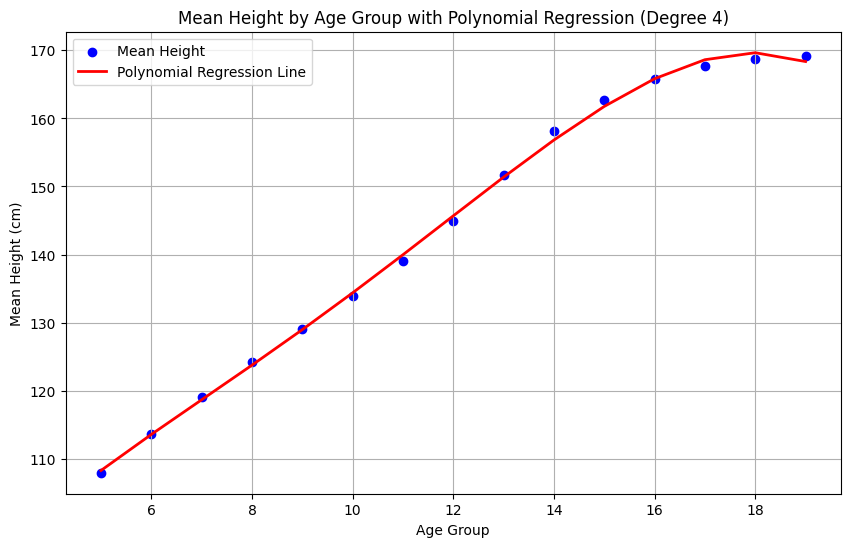

In [15]:
plot_polynomial_regression(age_height_df, degree=4)

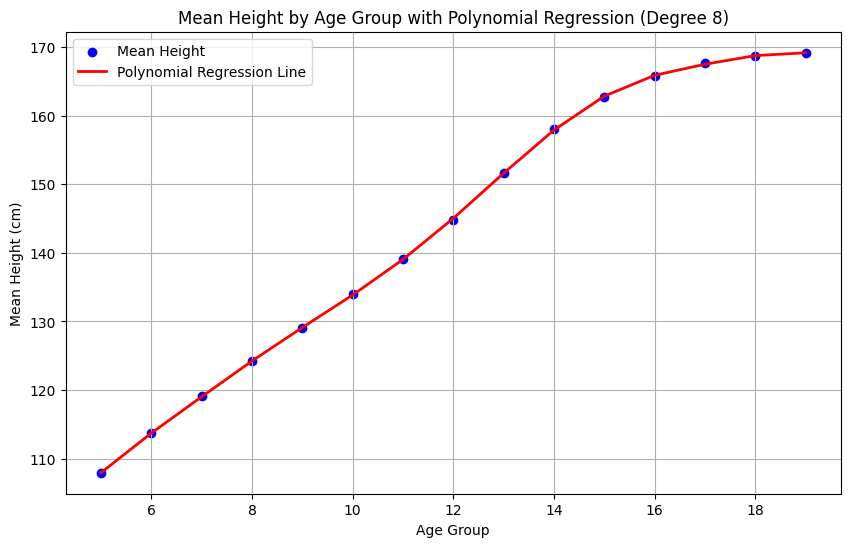

In [16]:
plot_polynomial_regression(age_height_df, degree=8)

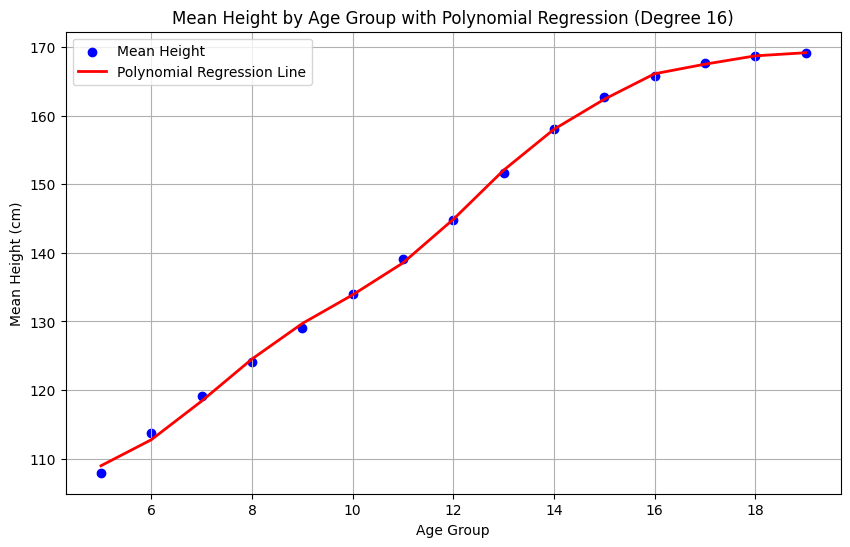

In [17]:
plot_polynomial_regression(age_height_df, degree=16)

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def compute_rmse(age_height_df, degree=2):
    # Prepare the data
    X = age_height_df[['Age group']].values
    y = age_height_df['Mean height'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Compute RMSE
    rmse = sqrt(mean_squared_error(y, y_poly_pred))
    return rmse




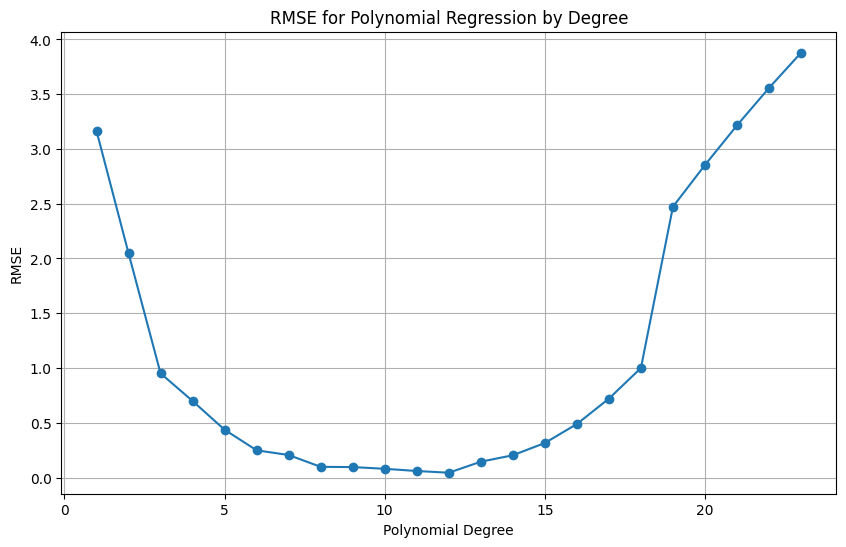

In [19]:
# Compute RMSE for polynomial degrees from 1 to 20
degrees = list(range(1, 24))
rmses = [compute_rmse(age_height_df, degree) for degree in degrees]

# Plot the RMSEs
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmses, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE for Polynomial Regression by Degree')
plt.grid(True)
plt.show()

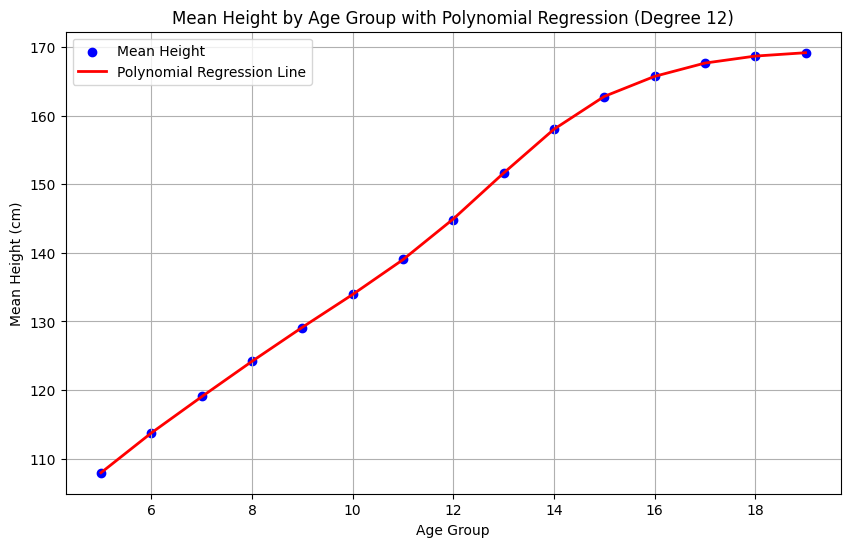

In [20]:
plot_polynomial_regression(age_height_df, degree=12)

# New dataset

In [21]:

def compute_rmse_with_new_x(age_height_df, new_data, degree=2):
    # Prepare the training data
    X_train = age_height_df[['Age group']].values
    y_train = age_height_df['Mean height'].values

    # Prepare the new X data
    new_X = np.array(new_data['Age group']).reshape(-1, 1)

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    new_X_poly = poly.transform(new_X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_new_pred = model.predict(new_X_poly)

    # Compute RMSE for training data
    rmse = sqrt(mean_squared_error(new_data['Mean height'], y_new_pred))

    plt.figure(figsize=(10, 6))
    plt.scatter(age_height_df['Age group'], age_height_df['Mean height'], color='blue', label='Mean Height')
    plt.plot(new_data['Age group'], new_data['Mean height'], color='green', linewidth=2, label='Mean Height-New data')
    plt.plot(age_height_df['Age group'], y_train_pred, color='red', linewidth=2, label='Polynomial Regression Line')
    plt.xlabel('Age Group')
    plt.ylabel('Mean Height (cm)')
    plt.title(f'Mean Height by Age Group with Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.grid(True)
    plt.show()


    return rmse, y_new_pred

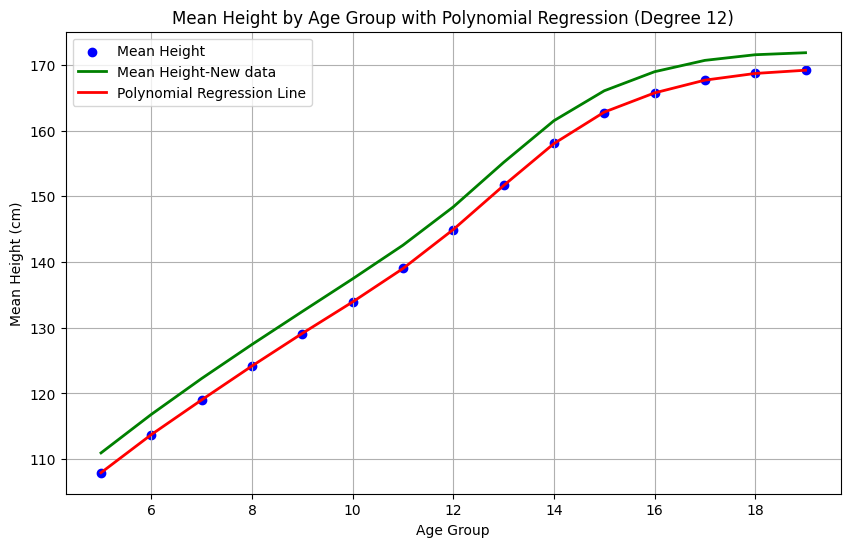

3.2405982610256885

In [22]:
df2=original_data.loc[(original_data['Country']=='Colombia')&(original_data['Year']==2019)&(original_data['Sex']=='Boys')]

rmse, y_new_pred = compute_rmse_with_new_x(age_height_df, df2, 12)

rmse

# Variance
 Variance error occurs when the model is too complex and captures noise in the training data as if it were true underlying patterns. High variance can cause the model to overfit, leading to excellent performance on the training data but poor generalization to new, unseen data.

In [23]:

def compute_variance_with_new_data(age_height_df, new_data, degree=2):
    # Prepare the training data
    X_train = age_height_df[['Age group']].values
    y_train = age_height_df['Mean height'].values

    # Prepare the new X data
    new_X = np.array(new_data['Age group']).reshape(-1, 1)
    new_y = new_data['Mean height'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    new_X_poly = poly.transform(new_X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_new_pred = model.predict(new_X_poly)

    # Compute variance of the residuals for the new data
    residuals = new_y - y_new_pred
    variance = np.var(residuals)

    return variance

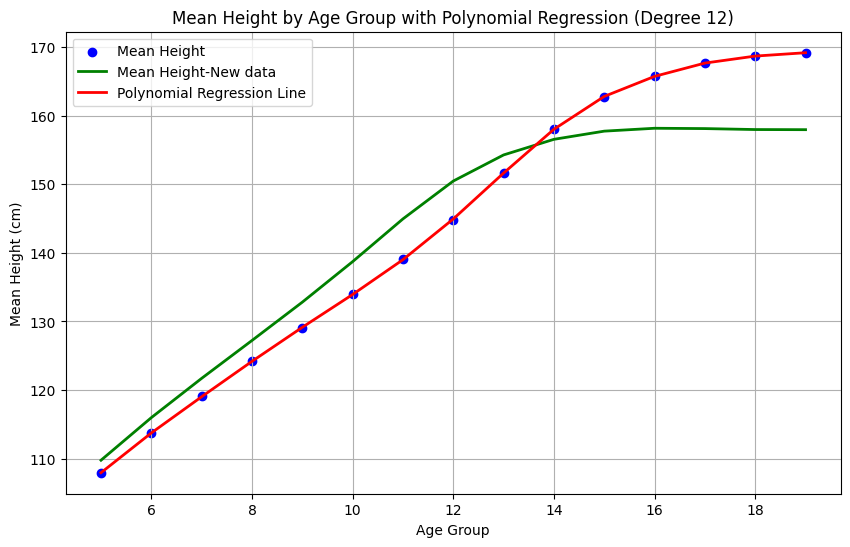

6.063184866832676

In [24]:
df2=original_data.loc[(original_data['Country']=='Colombia')&(original_data['Year']==2019)&(original_data['Sex']=='Girls')]

rmse, y_new_pred = compute_rmse_with_new_x(age_height_df, df2, 12)

rmse

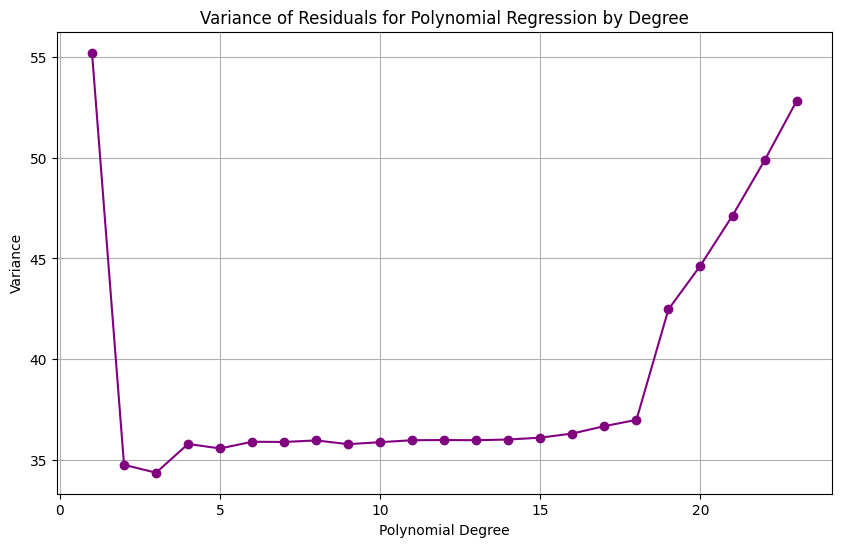

In [25]:
df2=original_data.loc[(original_data['Country']=='Colombia')&(original_data['Year']==2019)&(original_data['Sex']=='Girls')]


# Example usage: Compute variance for degrees from 1 to 23
degrees = list(range(1, 24))
variances = [compute_variance_with_new_data(age_height_df, df2, degree) for degree in degrees]
rmses = [compute_rmse(age_height_df, degree) for degree in degrees]
# Plot the variances
plt.figure(figsize=(10, 6))
plt.plot(degrees, variances, marker='o', color='purple')
plt.xlabel('Polynomial Degree')
plt.ylabel('Variance')
plt.title('Variance of Residuals for Polynomial Regression by Degree')
plt.grid(True)
plt.show()

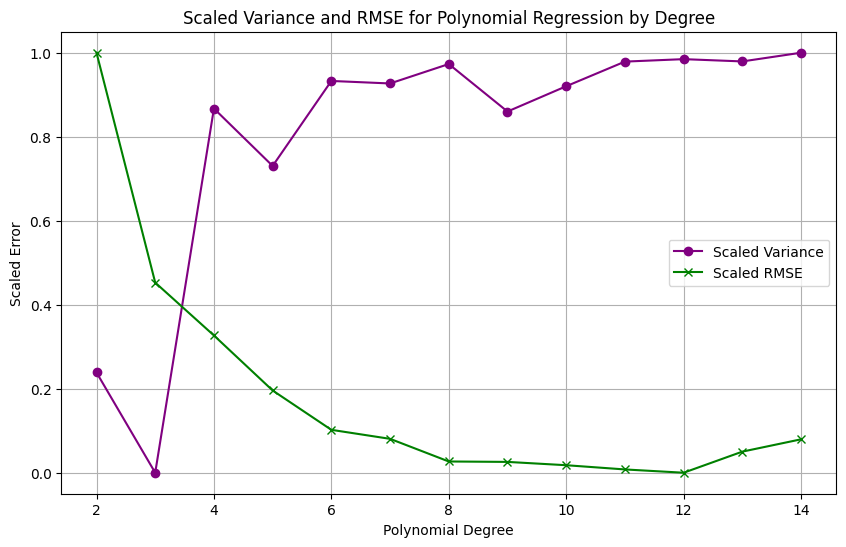

In [26]:
# Example usage: Compute variance and RMSE for degrees from 1 to 23
degrees = list(range(2, 15))
variances = [compute_variance_with_new_data(age_height_df, df2, degree) for degree in degrees]
rmses = [compute_rmse(age_height_df, degree) for degree in degrees]

# Scale the values for plotting
scaled_variances = (variances - np.min(variances)) / (np.max(variances) - np.min(variances))
scaled_rmses = (rmses - np.min(rmses)) / (np.max(rmses) - np.min(rmses))

# Plot the variances and RMSEs
plt.figure(figsize=(10, 6))
plt.plot(degrees, scaled_variances, marker='o', color='purple', label='Scaled Variance')
plt.plot(degrees, scaled_rmses, marker='x', color='green', label='Scaled RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Scaled Error')
plt.title('Scaled Variance and RMSE for Polynomial Regression by Degree')
plt.legend()
plt.grid(True)
plt.show()


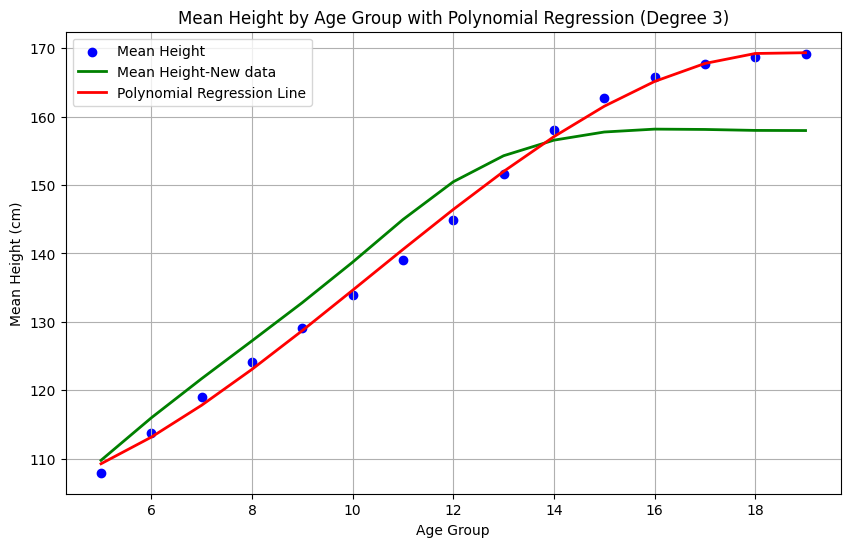

In [27]:
df2=original_data.loc[(original_data['Country']=='Colombia')&(original_data['Year']==2019)&(original_data['Sex']=='Girls')]

rmse, y_new_pred = compute_rmse_with_new_x(age_height_df, df2, 3)

# Managing the Bias-Variance Trade-Off



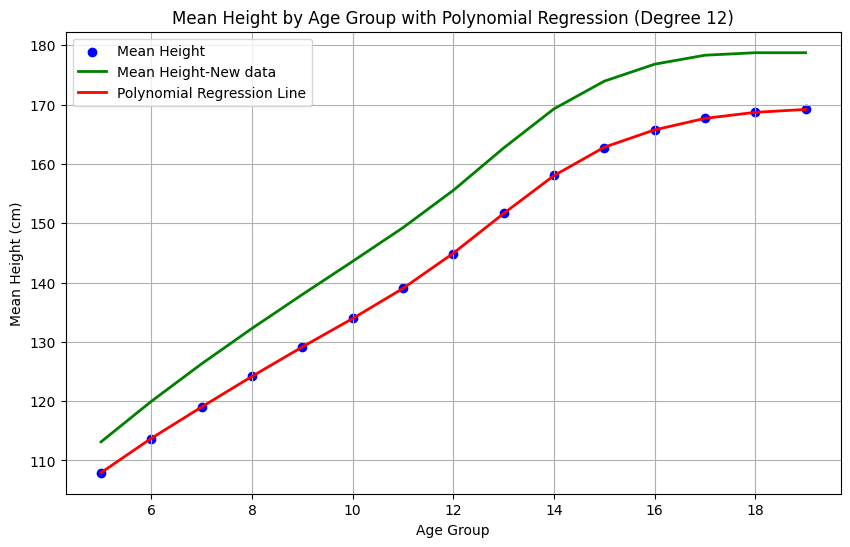

9.57143912668203

In [28]:
df2=original_data.loc[(original_data['Country']=='Canada')&(original_data['Year']==2019)&(original_data['Sex']=='Boys')]

rmse, y_new_pred = compute_rmse_with_new_x(age_height_df, df2, 12)

rmse

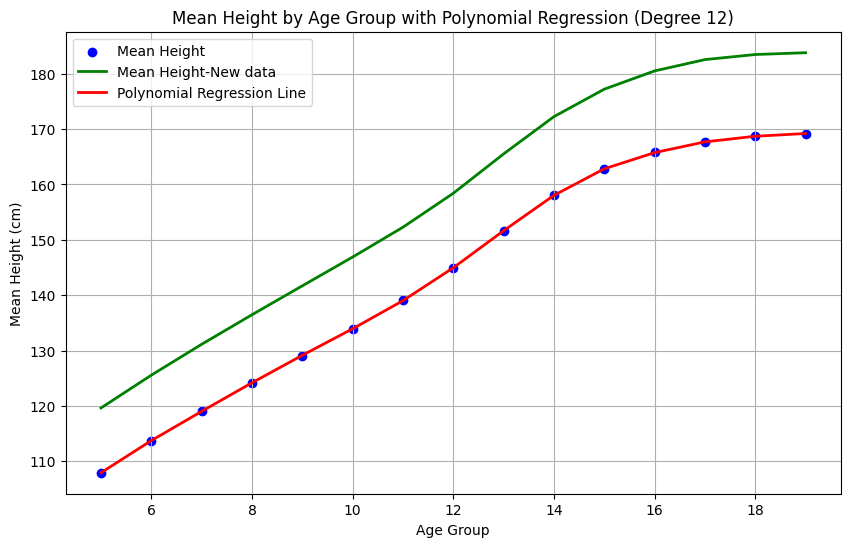

13.483331292468286

In [29]:
df2=original_data.loc[(original_data['Country']=='Netherlands')&(original_data['Year']==2019)&(original_data['Sex']=='Boys')]

rmse, y_new_pred = compute_rmse_with_new_x(age_height_df, df2, 12)

rmse

To effectively manage the bias-variance trade-off, it is crucial to utilize all available data efficiently. Here are key strategies:

* Cross-Validation
  * Purpose:
To split the data into training and validation sets.
To evaluate model performance and adjust complexity.
  * How It Works:
The dataset is divided into multiple folds.
The model is trained on some folds and validated on the remaining folds.
This process is repeated, and the results are averaged to ensure a robust evaluation.
*Regularization
Purpose:
  * To prevent overfitting in more complex models.
  * Techniques: Lasso, Ridge
  * Benefits:
Reduces model complexity.
Ensures that the model generalizes well to new, unseen data.


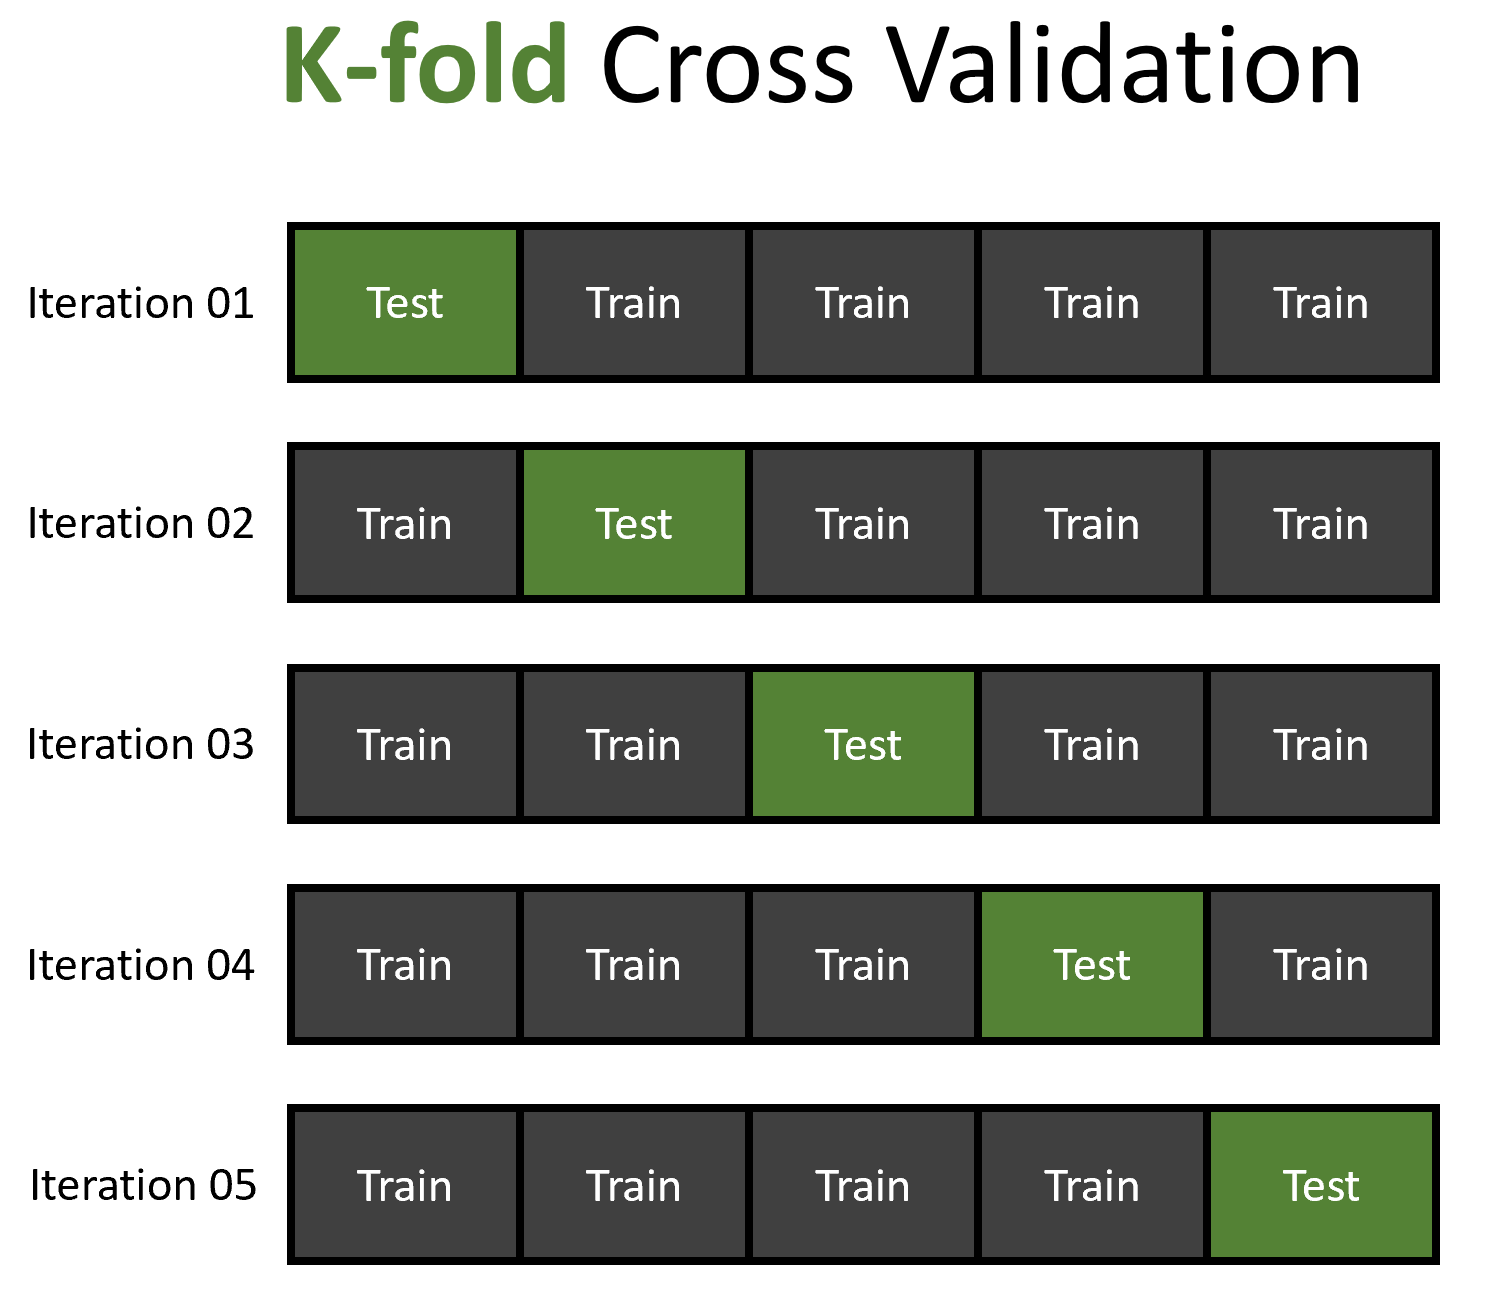

In [30]:
transformed_data=original_data.loc[original_data['Year']==2002].copy()
transformed_data['Sex'] = transformed_data['Sex'].apply(lambda x: 1 if x == 'Boys' else 0)

transformed_data=transformed_data[['Sex', 'Age group', 'Mean height','Country']]
transformed_data.sample(4)

,Sex,Age group,Mean height,Country
160919,0,19,155.798058,Malawi
115769,0,19,165.109846,Bermuda
129942,0,17,159.785271,Cyprus
100010,1,10,141.509191,United Kingdom


In [31]:
import pandas as pd
import requests

# URL for World Bank API to get country income classification
url = "http://api.worldbank.org/v2/country?format=json&per_page=300"

# Fetch the data
response = requests.get(url)
data = response.json()

# Extract relevant information
countries_info = pd.json_normalize(data[1])
income_classification = countries_info[['name', 'incomeLevel.value']]


# Optionally, display the entire DataFrame
income_classification




,name,incomeLevel.value
0,Aruba,High income
1,Africa Eastern and Southern,Aggregates
2,Afghanistan,Low income
3,Africa,Aggregates
4,Africa Western and Central,Aggregates
...,...,...
291,Sub-Saharan Africa excluding South Africa and ...,Aggregates
292,"Yemen, Rep.",Low income
293,South Africa,Upper middle income
294,Zambia,Lower middle income


In [32]:
transformed_data_income=pd.merge(transformed_data,income_classification,left_on='Country',right_on='name',how='left')
transformed_data_income['incomeLevel.value'].unique()
transformed_data_income['incomeLevel.value'] = transformed_data_income['incomeLevel.value'].apply(lambda x: 1 if x == 'High income' else 0)

transformed_data_income.sample(10)

,Sex,Age group,Mean height,Country,name,incomeLevel.value
4444,0,9,125.129469,Lao PDR,Lao PDR,0
5358,0,8,130.277862,Seychelles,Seychelles,1
708,1,8,130.641054,Cyprus,Cyprus,1
5521,0,6,113.018741,Sudan,Sudan,0
5316,0,11,140.732184,Saudi Arabia,Saudi Arabia,1
3560,0,10,137.476303,China,China,0
511,1,6,110.841094,Central African Republic,Central African Republic,0
1676,1,16,161.201298,Marshall Islands,Marshall Islands,0
358,1,18,179.637192,Bosnia and Herzegovina,Bosnia and Herzegovina,0
4167,0,17,158.446513,Haiti,Haiti,0


In [33]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
def compute_rmse_with_cv(df, degree=2, cv_folds=10):
    # Prepare the data
    X = df[['Age group','Sex','incomeLevel.value']].values
    y = df['Mean height'].values

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()

    # Define cross-validation strategy
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=1)

    # Compute cross-validated RMSE
    mse_scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=kf)
    rmse_scores = [sqrt(-mse) for mse in mse_scores]
    mean_rmse = np.mean(rmse_scores)

    return mean_rmse

In [34]:
compute_rmse_with_cv(transformed_data_income, degree=2)

4.551829530037827